In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import re
import seaborn as sns

In [ ]:
data = pd.read_csv(r'STKIHEHE.csv',encoding='cp1252',nrows=100)
data.head(100)[['title', 'abstrak','truelabel']]

,title,abstrak,truelabel
0,APLIKASI CHATBOT BERBASIS WEB MENGGUNAKAN METO...,Chatbot adalah sebuah program komputer yang di...,0
1,Pelabelan Data Dengan Latent Dirichlet Allocat...,Media sosial telah cukup lama menjadi sumber u...,0
2,Penerapan Computer Vision Untuk Pendeteksian D...,Pembatasan kapasitas pengunjung pada suatu tem...,0
3,Klasifikasi Citra Game Batu Kertas Gunting Men...,"Permainan batu, gunting, dan kertas sangat pop...",0
4,ANALISIS USAHA TERNAK AYAM BROILER DI PETERNAK...,Penelitian ini bertujuan untuk mengetahui besa...,3
...,...,...,...
95,Deteksi Pelanggaran Lampu Lalu Lintas Berdasar...,Peningkatan jumlah pengendara yang pesat beref...,0
96,Aplikasi Pengolahan Sinyal Suara pada Teknolog...,Dalam konsep Kecerdasan Buatan (Artificial Int...,0
97,PENDEKATAN ANN (ARTIFICIAL NEURAL NETWORK) UNT...,Pengambilan keputusan dalam estimasi biaya dal...,0
98,Implementasi Algoritma Artificial Neural Netwo...,Perkembangan kecerdasan buatan telah dimanfaat...,0


In [ ]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """Fungsi ini membersihkan teks input dengan
     - menghapus link
     - menghapus karakter khusus
     - menghapus nomor
     - menghapus stopwords
     - mengubah dalam huruf kecil
     - menghapus spasi yang berlebihan
     Argumen:
         teks (str): teks untuk dibersihkan
         remove_stopwords (bool): True = hapus stopwords atau False = tidak
     """
    # Hapus links
    text = re.sub(r"http\S+", "", str(text))
    # Hapus nomor dan karakter khusus
    text = re.sub("[^A-Za-z]+", " ", str(text))
    # Hapus stopwords
    if remove_stopwords:
        # 1. Membuat Token
        tokens = nltk.word_tokenize(text)
        # 2. Mengecek token apabila terdapat stopwords maka dihapus
        stopwords_ind = stopwords.words("indonesian")
        stopwords_ind += ['com','rp','m','ol','nan','and'] #tambahan apabila stopwords tidak terdapat dalam corpus
        tokens = [w for w in tokens if not w.lower() in stopwords_ind]
        # 3. Mengabungkan token kembali
        text = " ".join(tokens)
    #mereturn text yang sudah dicleaning dengan huruf kecil
    text = text.lower().strip()
    return text

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

data['cleanedtitle'] = data['title'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
data['cleanedabstrak'] = data['abstrak'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
data.head(100)[['title', 'abstrak','cleanedtitle','cleanedabstrak']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,abstrak,cleanedtitle,cleanedabstrak
0,APLIKASI CHATBOT BERBASIS WEB MENGGUNAKAN METO...,Chatbot adalah sebuah program komputer yang di...,aplikasi chatbot berbasis web metode dialogflow,chatbot program komputer dirancang menstimulas...
1,Pelabelan Data Dengan Latent Dirichlet Allocat...,Media sosial telah cukup lama menjadi sumber u...,pelabelan data latent dirichlet allocation k m...,media sosial sumber utama sentimen analisis tr...
2,Penerapan Computer Vision Untuk Pendeteksian D...,Pembatasan kapasitas pengunjung pada suatu tem...,penerapan computer vision pendeteksian penghit...,pembatasan kapasitas pengunjung situasi kondis...
3,Klasifikasi Citra Game Batu Kertas Gunting Men...,"Permainan batu, gunting, dan kertas sangat pop...",klasifikasi citra game batu kertas gunting con...,permainan batu gunting kertas populer dunia pe...
4,ANALISIS USAHA TERNAK AYAM BROILER DI PETERNAK...,Penelitian ini bertujuan untuk mengetahui besa...,analisis usaha ternak ayam broiler peternakan ...,penelitian bertujuan besarnya pendapatan usaha...
...,...,...,...,...
95,Deteksi Pelanggaran Lampu Lalu Lintas Berdasar...,Peningkatan jumlah pengendara yang pesat beref...,deteksi pelanggaran lampu lintas berdasarkan s...,peningkatan pengendara pesat berefek pelanggar...
96,Aplikasi Pengolahan Sinyal Suara pada Teknolog...,Dalam konsep Kecerdasan Buatan (Artificial Int...,aplikasi pengolahan sinyal suara teknologi kec...,konsep kecerdasan buatan artificial intellegen...
97,PENDEKATAN ANN (ARTIFICIAL NEURAL NETWORK) UNT...,Pengambilan keputusan dalam estimasi biaya dal...,pendekatan ann artificial neural network penen...,pengambilan keputusan estimasi biaya proses pe...
98,Implementasi Algoritma Artificial Neural Netwo...,Perkembangan kecerdasan buatan telah dimanfaat...,implementasi algoritma artificial neural netwo...,perkembangan kecerdasan buatan dimanfaatkan bi...


In [ ]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Membangun kamus (dictionary) dari data
texts = [document.split() for document in data['cleanedabstrak']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Menentukan jumlah topik yang akan dievaluasi
num_topics = range(2, 10)
coherence_scores = []

for n in num_topics:
    # Melatih model LDA pada data dengan jumlah topik n
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=n)

    # Menghitung coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Menampilkan hasil coherence score untuk setiap jumlah topik
for n, score in zip(num_topics, coherence_scores):
    print("Number of topics: {}, Coherence Score: {}".format(n, score))

Number of topics: 2, Coherence Score: 0.27115206894999616
Number of topics: 3, Coherence Score: 0.2983856000929264
Number of topics: 4, Coherence Score: 0.3358686428907555
Number of topics: 5, Coherence Score: 0.3273456164620884
Number of topics: 6, Coherence Score: 0.2896608763863466
Number of topics: 7, Coherence Score: 0.3510045737084498
Number of topics: 8, Coherence Score: 0.3620377388789295
Number of topics: 9, Coherence Score: 0.334310709517401


In [ ]:
sentences = [doc.lower().split() for doc in data['cleanedabstrak']]

In [ ]:
import os
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

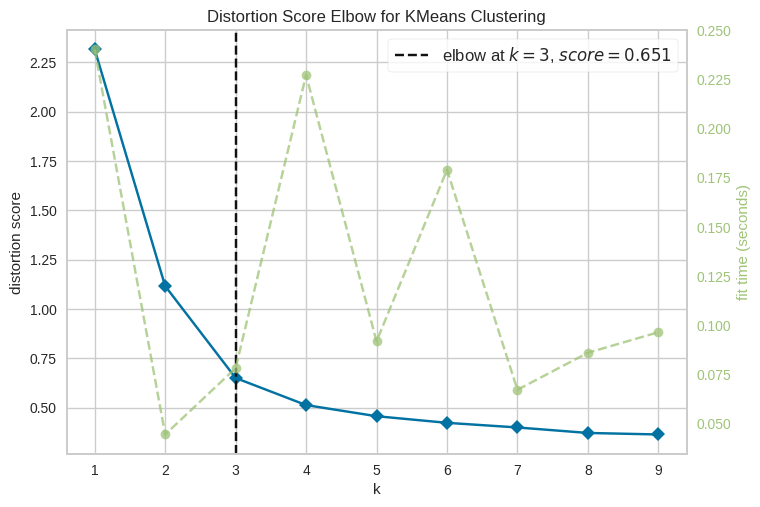

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = Word2Vec(sentences, window=5, min_count=7, workers=4)

word_vectors = model.wv
word_vectors_matrix = word_vectors.vectors[:100]

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(word_vectors_matrix)
visualizer.show()

In [ ]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(word_vectors_matrix)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(word_vectors_matrix)
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

data['cluster'] = clusters
data['x0'] = x0
data['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """Fungsi ini mengembalikan kata kunci untuk setiap centroid KMeans"""
    word_vectors = model.wv
    centroids = kmeans.cluster_centers_

    for i, centroid in enumerate(centroids):
        distances = np.linalg.norm(word_vectors.vectors - centroid, axis=1)
        top_indices = np.argsort(distances)[:n_terms]
        top_keywords = [word_vectors.index_to_key[idx] for idx in top_indices]

        print('\nCluster {}'.format(i))
        print(','.join(top_keywords))

get_top_keywords(10)


Cluster 0
negara,kebutuhan,kontrol,bertujuan,berdasarkan,kalori,membantu,analisis,robot,dunia

Cluster 1
internet,bentuk,tingkat,optimal,mendeteksi,sesuai,ai,pembelajaran,produk,mengalami

Cluster 2
metode,sistem,penelitian,hasil,memiliki,data,manusia,keamanan,pid,pelanggan

Cluster 3
proses,salah,cyber,siber,pelanggan,tepung,nilai,indonesia,informasi,pid


In [ ]:
data.loc[0:9, 'cluster']

0    2
1    2
2    2
3    2
4    3
5    3
6    3
7    3
8    3
9    0
Name: cluster, dtype: int32

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik-metrik evaluasi
accuracy = accuracy_score(data['truelabel'], data['cluster'])
precision = precision_score(data['truelabel'], data['cluster'], average='weighted')
recall = recall_score(data['truelabel'], data['cluster'], average='weighted')
f1 = f1_score(data['truelabel'], data['cluster'], average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.33
Precision: 0.3976697386420909
Recall: 0.33
F1 Score: 0.3460470085470086


In [ ]:
data.loc[0:9,'cluster']

0    2
1    2
2    2
3    2
4    3
5    3
6    3
7    3
8    3
9    0
Name: cluster, dtype: int32

In [ ]:
data.loc[0:9,'truelabel']

0    0
1    0
2    0
3    0
4    3
5    0
6    2
7    0
8    0
9    0
Name: truelabel, dtype: int64

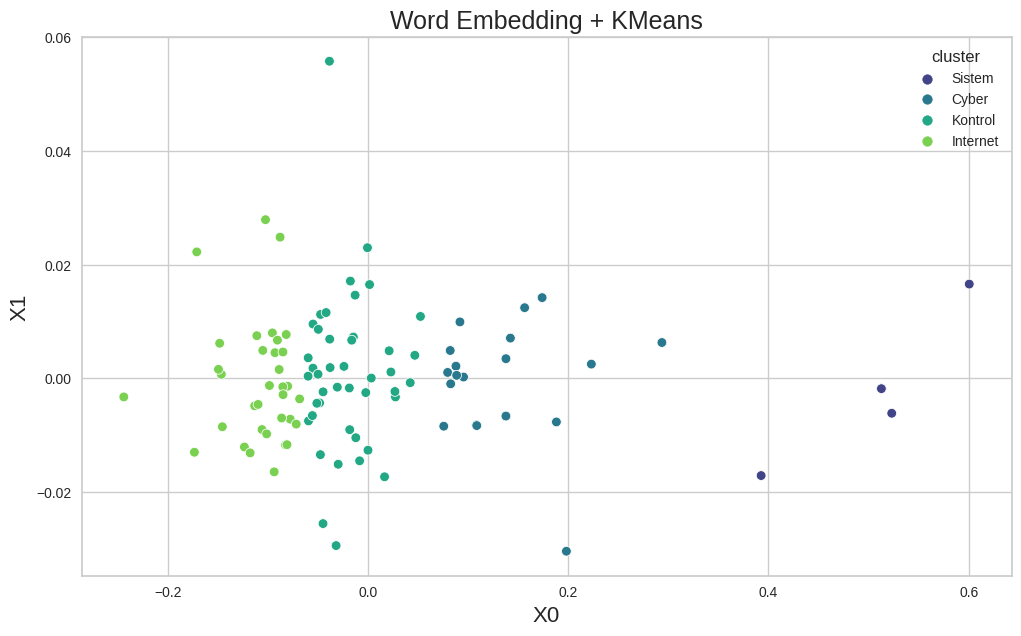

In [ ]:
cluster_map = {0: "Kontrol", 1: "Internet", 2: "Sistem",3:"Cyber"} # Mapping dari cluster yang didapat dari fungsi get_top_keywords
data['cluster'] = data['cluster'].map(cluster_map)

#Image size
plt.figure(figsize=(12, 7))
#Judul
plt.title("Word Embedding + KMeans", fontdict={"fontsize": 18})
#AXIS X = X0, AXIS Y = X1
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#plot
sns.scatterplot(data=data, x='x0', y='x1', hue='cluster', palette="viridis")

plt.show()